In [1]:
import cantera as ct
import numpy as np

In [8]:
file = '/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/deepflame_ethanol_gri_reduced/ethanol66.yaml'

In [9]:
sol = ct.Solution(file)

/tmp/ipykernel_314231/3381750254.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  sol = ct.Solution(file)
/tmp/ipykernel_314231/3381750254.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  sol = ct.Solution(file)
/tmp/ipykernel_314231/3381750254.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  sol = ct.Solution(file)
/tmp/ipykernel_314231/3381750254.py:1: UserWarning: NasaPoly2::validate: 
For species 

In [13]:
Y_air_N2= 0.767
Y_air_O2= 0.233
Y_fuel = 0.09


# for j, phi in enumerate(phi_list):
# print("NNNNNNNNNNNNNNNNNNN  ", j)
# gas.set_equivalence_ratio(0, 'C2H5OH', {'O2':1, 'N2': 3.76})
    # gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
sol.TPY = 293, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 

In [15]:
init_TPY = sol.TPY

In [71]:

def chem_step(TPY):
    sol.TPY =TPY
    sol.equilibrate("HP")

    # r = ct.IdealGasConstPressureReactor(sol)
    # # r = ct.Reactor(name='adiabatic_reactor', contents=gas)
    # sim = ct.ReactorNet([r])
    # # time = 0.0
    # states = ct.SolutionArray(sol, extra=['t'])
    # while sim.time < 0.1:
    #     # print(sim.time) 
    #     # if fixed_iter is not None:
    #     sim.advance(sim.time + 0.0001)
    #     # else:
    #     # sim.step()
    #     states.append(r.thermo.state, t=sim.time)
    #     # print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(
    #     #     sim.time, r.T, r.thermo.P, r.thermo.u))
    #     # if rate_tol is not None:
    #     #     if states.maxrate[-1] < rate_tol:
    #     #         break
    #     # if X_eq is not None:
    #     #     if np.abs(gas.X - X_eq).sum() < X_eq_tol:
        #         break
    return sol.TPY
    

In [78]:
def diff_step(TPY, t, tauT, tauY):
    T0, P, Y0 = TPY
    T1 = (T0  - init_TPY[0]) * np.exp(-t/tauT) + init_TPY[0]
    Y1 = (Y0  - init_TPY[2]) * np.exp(-t/tauY) + init_TPY[2]
    return T1, P, Y1

In [87]:
TPY = chem_step(init_TPY)
# TPY = init_TPY

In [88]:
TPY

(2138.353998748413,
 100000.00000000054,
 array([6.97970000e-01, 0.00000000e+00, 0.00000000e+00, 4.11010138e-06,
        2.55544709e-02, 1.88436540e-03, 1.54992283e-04, 5.99899643e-05,
        1.04010611e-01, 1.33639737e-06, 2.78570474e-03, 1.67574335e-01,
        8.75905144e-11, 2.96518775e-19, 1.19912409e-19, 1.00826596e-12,
        5.30144194e-20, 2.96291846e-21, 4.11326472e-30, 5.67140473e-20,
        1.92278473e-35, 1.08208960e-36, 8.39974248e-08, 1.40144461e-24,
        4.58178220e-30, 1.44338551e-27, 7.11018536e-22, 1.44041554e-18,
        1.84922327e-28, 5.48457638e-27, 3.76309981e-36, 2.44136920e-35,
        4.86936216e-35, 2.15680019e-37]))

In [89]:
TPY = diff_step(TPY, 5, 1, 1)
TPY

(np.float64(305.43389743811724),
 100000.00000000054,
 array([6.97970000e-01, 0.00000000e+00, 0.00000000e+00, 2.76936452e-08,
        2.10773538e-01, 1.26967542e-05, 1.04432979e-06, 4.04209200e-07,
        7.00817983e-04, 9.00457462e-09, 1.87699309e-05, 1.12910699e-03,
        5.90180244e-13, 1.99792779e-21, 8.07963454e-22, 6.79364260e-15,
        3.57208348e-22, 1.99639875e-23, 2.77149597e-32, 3.82136245e-22,
        1.29556216e-37, 7.29106235e-39, 5.65970197e-10, 9.44285953e-27,
        3.08718056e-32, 9.72545510e-30, 4.79080521e-24, 9.70544358e-21,
        1.24599684e-30, 3.69547850e-29, 8.93935848e-02, 1.64498163e-37,
        3.28095042e-37, 1.45324054e-39]))

In [92]:
import copy

In [134]:
TPYs = []
TPY = copy.copy(init_TPY)
TPYs.append(init_TPY)
for i in range(20):
    TPY = chem_step(TPY)
    print("chem step T", TPY[0])
    TPYs.append(TPY)
    TPY = diff_step(TPY, 5, 20, 30)
    print("diff step T", TPY[0])
    TPYs.append(TPY)



chem step T 2138.353998748413
diff step T 1730.1631392692123
chem step T 2012.3074002016126
diff step T 1631.9979496174772
chem step T 1906.8017749818682
diff step T 1549.830086077902
chem step T 1822.5647898947127
diff step T 1484.226256128451
chem step T 1756.9732235834895
diff step T 1433.1434929223906
chem step T 1706.542145061913
diff step T 1393.8677294786512
chem step T 1668.0275873693975
diff step T 1363.8725617880714
chem step T 1638.7279604234634
diff step T 1341.0539893788778
chem step T 1616.492559315607
diff step T 1323.7370415841724
chem step T 1599.6452803985892
diff step T 1310.6163675709768
chem step T 1586.8946213914746
diff step T 1300.6861443515595
chem step T 1577.252041384752
diff step T 1293.1764954914952
chem step T 1569.9640777842196
diff step T 1287.5006237324046
chem step T 1564.4580598120729
diff step T 1283.2125326240916
chem step T 1560.2995772267889
diff step T 1279.9739031302834
chem step T 1557.1595573573998
diff step T 1277.5284531971433
chem step T 15

In [135]:
def calc_Y_r(TPY):
    return sum(TPY[2][[sol.species_index("C2H5OH"), sol.species_index("O2")]])

In [136]:
Y_rs = [calc_Y_r(TPY) for TPY in TPYs]
Ts = [T for T, _, _ in TPYs]

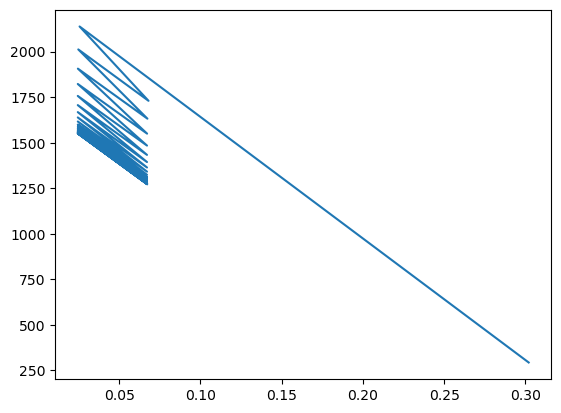

In [137]:
plt.plot(Y_rs, Ts)

In [75]:
Y_r

np.float64(0.30202999999999997)

In [29]:
import matplotlib.pyplot as plt

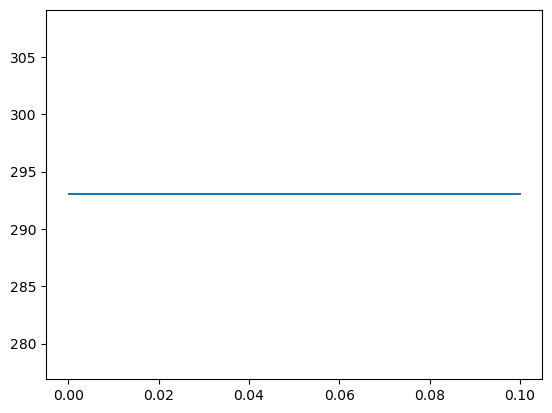

In [26]:
plt.plot(states.t,  states.T)

In [10]:
ct.__version__

'3.0.1'